In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from sklearn.model_selection import train_test_split

<Figure size 720x540 with 0 Axes>

In [2]:
data = pd.read_csv("salary.csv")

In [3]:
data.shape

(8850, 15)

In [4]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4826,35,Private,66304,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
8108,34,Private,209691,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,66,United-States,<=50K
6604,22,Local-gov,117789,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K
492,33,Private,175856,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
8781,52,Private,231865,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,46,United-States,<=50K


In [5]:
data['income'] = data['income'].replace({'<=50K':0,'>50K':1})

In [6]:
data.isnull().any().sum()

3

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [8]:
# Encoding Categorical Features
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [9]:
data_num=data[numeric_var_names]
data_num.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


In [10]:
my_df = data[cat_var_names]
my_df.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States


In [13]:
len(my_df['education'].value_counts())

6

In [12]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [15]:
my_df.isnull().sum()

workclass         536
education           0
marital-status      0
occupation        537
relationship        0
race                0
gender              0
native-country    143
dtype: int64

In [16]:
my_df['workclass'].mode().iloc[0]

'Private'

In [17]:
my_df['workclass'].value_counts()

Private             6047
Self-emp-not-inc     721
Local-gov            564
State-gov            392
Self-emp-inc         334
Federal-gov          252
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64

In [18]:
for i in my_df[['workclass', 'education', 'marital-status', 'occupation',  'relationship', 'race', 'gender', 'native-country']]:
    my_df[i] = my_df[i].fillna((my_df[i].mode()).iloc[0])


C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [20]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.98))
    x = x.clip_lower(x.quantile(0.02))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
num_summary=data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,8850.0,0.0,3.415390e+05,38.591977,37.0,13.475767,1.815963e+02,18.0,18.0,20.00,22.0,28.00,37.0,48.0,58.0,64.00,70.0,70.0
fnlwgt,8850.0,0.0,1.648332e+09,186252.152339,178007.0,96680.380126,9.347096e+09,30795.6,30795.6,39810.55,63102.6,115590.75,178007.0,237546.0,323829.4,376223.35,446899.0,446899.0
educational-num,8850.0,0.0,8.922600e+04,10.082034,10.0,2.470814,6.104921e+00,4.0,4.0,5.00,7.0,9.00,10.0,12.0,13.0,14.00,15.0,15.0
capital-gain,8850.0,0.0,5.172765e+06,584.493220,0.0,2300.668997,5.293078e+06,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4931.00,13550.0,13550.0
capital-loss,8850.0,0.0,7.372040e+05,83.299887,0.0,379.077537,1.436998e+05,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1902.0,1902.0
hours-per-week,8850.0,0.0,3.567150e+05,40.306780,40.0,11.488693,1.319901e+02,10.0,10.0,18.00,24.9,40.00,40.0,45.0,55.0,60.00,70.0,70.0
income,8850.0,0.0,2.067000e+03,0.233559,0.0,0.423119,1.790296e-01,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1.00,1.0,1.0


In [22]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

num_summary=num_summary.apply(lambda x: Missing_imputation(x))

In [23]:
newdata = pd.concat([my_df,data_num],axis=1)

In [24]:
newdata.shape

(8850, 15)

In [25]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
for c_feature in my_df.columns:
    newdata = create_dummies( newdata, c_feature )

In [32]:
newdata.shape

(8850, 84)

In [26]:
num_list=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']   
hrdf_transform = newdata[num_list].copy()
squared = (hrdf_transform**2).add_suffix("_squared")
square_root = (hrdf_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(hrdf_transform+1).add_suffix("_ln")
hrdf_transform = pd.concat([hrdf_transform, squared, square_root, natural_log], axis=1)
hrdf_transform.drop(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1, inplace=True)
hrdf_transform.head()

,age_squared,fnlwgt_squared,educational-num_squared,capital-gain_squared,capital-loss_squared,hours-per-week_squared,age_sqrt,fnlwgt_sqrt,educational-num_sqrt,capital-gain_sqrt,capital-loss_sqrt,hours-per-week_sqrt,age_ln,fnlwgt_ln,educational-num_ln,capital-gain_ln,capital-loss_ln,hours-per-week_ln
0,625,5.143915e+10,49,0,0,1600,5.000000,476.237336,2.645751,0.000000,0.0,6.324555,3.258097,12.331837,2.079442,0.000000,0.0,3.713572
1,1444,8.066555e+09,81,0,0,2500,6.164414,299.689840,3.000000,0.000000,0.0,7.071068,3.663562,11.405507,2.302585,0.000000,0.0,3.931826
2,784,1.135360e+11,144,0,0,1600,5.291503,580.474806,3.464102,0.000000,0.0,6.324555,3.367296,12.727696,2.564949,0.000000,0.0,3.713572
3,1936,2.570346e+10,100,59105344,0,1600,6.633250,400.403546,3.162278,87.681241,0.0,6.324555,3.806662,11.984952,2.397895,8.947546,0.0,3.713572
4,324,1.071163e+10,100,0,0,900,4.242641,321.709496,3.162278,0.000000,0.0,5.477226,2.944439,11.547308,2.397895,0.000000,0.0,3.433987


In [27]:
newdata2= pd.concat([newdata,hrdf_transform],axis=1)

In [28]:
newdata2.shape

(8850, 102)

In [29]:
y= newdata2['income']

In [30]:
del newdata2['income']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(newdata2, y, test_size = 0.3, stratify=y, random_state = 100) 

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rnd_clf = RandomForestClassifier()

In [36]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred= rnd_clf.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8519774011299435
Precision Score : 0.7462039045553145
Recall Score : 0.5548387096774193
F1 Score : 0.6364477335800185


In [38]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[1918  117]
 [ 276  344]]


In [39]:
rnd_clf.feature_importances_

array([4.88808610e-02, 4.59950260e-02, 2.71981439e-02, 2.86476749e-02,
       1.00549016e-02, 2.45121524e-02, 4.72595660e-03, 0.00000000e+00,
       8.92567238e-03, 4.34928713e-03, 6.71365270e-03, 3.35290907e-03,
       0.00000000e+00, 3.09846150e-03, 1.33194066e-03, 3.19767101e-03,
       5.16975366e-03, 3.79267378e-03, 3.96348638e-02, 2.19437700e-02,
       2.59209804e-03, 7.98222944e-05, 6.28121349e-03, 1.52695330e-02,
       2.94148801e-03, 2.38895015e-03, 4.10151618e-03, 5.60942031e-03,
       1.10347658e-04, 7.10844102e-03, 2.51689186e-03, 6.17181797e-03,
       2.49516727e-03, 3.89856810e-03, 2.24017913e-02, 1.59356804e-03,
       6.11326528e-03, 1.01406781e-02, 8.33358967e-03, 2.39427528e-03,
       3.27546058e-03, 4.95237885e-04, 4.56605886e-03, 1.28912839e-02,
       4.31292745e-04, 3.98139959e-04, 7.80975759e-05, 5.33435193e-04,
       2.05164338e-04, 1.38615262e-04, 3.36035669e-04, 1.88654747e-04,
       3.31752503e-05, 2.38676334e-04, 1.29730984e-04, 6.60859375e-05,
      

In [40]:
for name, importance in zip(newdata2.columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

age = 0.04888086097863589
fnlwgt = 0.04599502596140728
educational-num = 0.02719814390200219
capital-gain = 0.028647674911694055
capital-loss = 0.010054901646591024
hours-per-week = 0.0245121523932128
workclass_Local-gov = 0.004725956604858778
workclass_Never-worked = 0.0
workclass_Private = 0.008925672384885846
workclass_Self-emp-inc = 0.00434928712926968
workclass_Self-emp-not-inc = 0.006713652703301861
workclass_State-gov = 0.0033529090665477155
workclass_Without-pay = 0.0
education_CommunityCollege = 0.003098461496503494
education_Doctorate = 0.0013319406593260193
education_HighGrad = 0.003197671009557188
education_Masters = 0.005169753663583745
education_dropout = 0.0037926737818922422
marital-status_NotMarried = 0.03963486378901512
marital-status_Separated = 0.02194377002126619
marital-status_Widowed = 0.0025920980424633546
occupation_Armed-Forces = 7.982229444349818e-05
occupation_Craft-repair = 0.006281213490975937
occupation_Exec-managerial = 0.015269532973210133
occupation_Fa

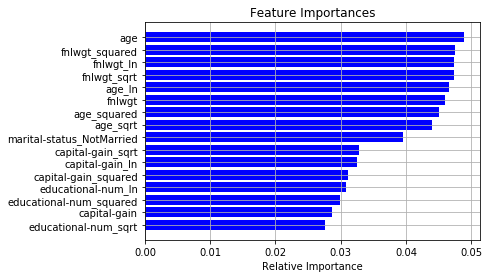

In [42]:
features = newdata2.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[85:]#101-16=85
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)] ## Number of trees in random forest
max_features = ['auto','sqrt']## Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)] ## Maximum number of levels in tree
#max_depth.append(None)
min_samples_split = [2] ## Minimum number of samples required to split a node
min_samples_leaf = [2]## Minimum number of samples required at each leaf node
bootstrap = [True, False] ## Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 1100, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20], 'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap': [True, False]}


In [45]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [46]:
rf_random.fit(X_train, y_train)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [47]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [48]:
y_pred= rf_random.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8538606403013183
Precision Score : 0.7761904761904762
Recall Score : 0.5258064516129032
F1 Score : 0.6269230769230769


In [49]:
rf_random.feature_importances_

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [50]:
rnd_clf = RandomForestClassifier(n_estimators = 2000,min_samples_split= 2,min_samples_leaf= 2,max_features='auto',max_depth= 20,
 bootstrap= True)

In [51]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rnd_clf.feature_importances_

array([4.25011374e-02, 3.27669284e-02, 3.72828280e-02, 3.97618828e-02,
       1.17631942e-02, 2.30108415e-02, 3.23018652e-03, 0.00000000e+00,
       6.06589329e-03, 2.98787299e-03, 5.30715198e-03, 2.15558108e-03,
       0.00000000e+00, 3.30858633e-03, 1.42524088e-03, 2.89669850e-03,
       6.42674009e-03, 5.01705997e-03, 5.23602058e-02, 2.73909134e-02,
       2.34818612e-03, 2.36673188e-06, 3.22278097e-03, 1.68968449e-02,
       1.67651038e-03, 9.07305764e-04, 2.13293479e-03, 5.13424206e-03,
       3.17710655e-05, 5.55439837e-03, 1.27243518e-03, 3.60608631e-03,
       1.12071853e-03, 2.09519389e-03, 2.98755117e-02, 9.15677369e-04,
       8.43433152e-03, 1.11155840e-02, 9.10060021e-03, 1.19620438e-03,
       2.20655403e-03, 1.73277375e-04, 3.33257865e-03, 1.51112801e-02,
       8.12688351e-05, 5.11828716e-05, 3.15230480e-06, 8.47419103e-05,
       2.68959345e-05, 4.28274334e-06, 1.03485774e-04, 2.69969013e-05,
       1.77199603e-07, 7.88623022e-06, 6.07391255e-05, 3.14953269e-07,
      

In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [18,10],'max_features': ['auto', 3],
    'min_samples_leaf': [30, 40],'min_samples_split': [8, 10],'n_estimators': [200,500]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)

In [54]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   47.4s finished


{'bootstrap': True,
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'min_samples_split': 8,
 'n_estimators': 500}

In [56]:
y_pred= grid_search.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8549905838041432
Precision Score : 0.8201634877384196
Recall Score : 0.4854838709677419
F1 Score : 0.6099290780141844
